# PCA Experiments

In [1]:
#NumPy: numerical scientific computing 
import numpy as np

#Scikit-learn: machine learning
from sklearn.decomposition import PCA

#Matplotlib: plotting 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#%matplotlib notebook

#SciPy: scientific tools
import scipy.io.matlab as matlab


# 'Guess data' from high-dimensional feature vectors 

In [2]:
# Lectura de fichero de Matlab .mat
mat_file =  "guess_data.mat"
mat = matlab.loadmat(mat_file,squeeze_me=True) #devuelve un dictionary
#print(list(mat.keys())) #variables almacenadas

# Lectura de los datos
X = mat["x"]   
del mat
print(X.shape)

(1981, 200)


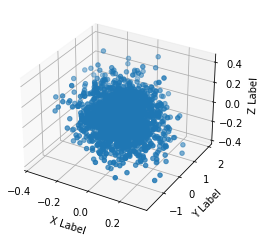

In [3]:
#Exploracion visual de los datos (3D)
#%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()


No podemos ver gran cosa en nuestros datos, solo vemos una nube de puntos 3-dimensional. Vamos a realizar una PCA:

In [8]:
#PCA
pca = PCA(n_components = 3, svd_solver='full')
pca.fit(X)
D = pca.explained_variance_
U = pca.components_.T
mu = pca.mean_
perc = pca.explained_variance_ratio_
n_components = pca.n_components_
Y = pca.transform(X)
print(U.shape)

(200, 3)


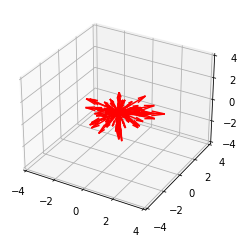

In [6]:
#Eigenvalues, sorted in decreasing order
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(mu, mu, mu, 10*U[:,0],10* U[:,1], 10*U[:,2], color='r')
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
ax.set_zlim([-4, 4])
plt.show()

Hemos representado las direcciones de mayor varianza (centrados en la media). Ahora vamos a graficar los datos transformados por la PCA.

C:\Users\danie\AppData\Local\Temp\ipykernel_13924\3446046913.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
c:\Users\danie\anaconda3\envs\Machine_Learning\lib\site-packages\matplotlib\collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


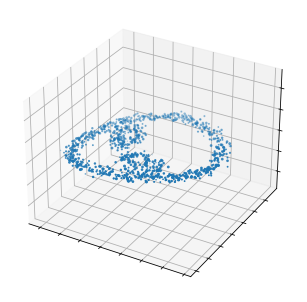

In [7]:
#Exploracion visual de los datos (3D)
fig = plt.figure()
ax = Axes3D(fig)
plt.scatter(Y[:,0],Y[:,1], Y[:,2])
ax.w_xaxis.set_ticklabels([]); ax.w_yaxis.set_ticklabels([]); ax.w_zaxis.set_ticklabels([]);

Sorprendentemente podemos ver la cabeza de un alien, poniendo en manifiesto lo mucho que se pueden transformar unos datos al aplicar una PCA.